# A calculation of the order of convergence when the limit value is unknown

## _This problem is an optional extension of the previous exercise sheets_

Assume we have determined numerically an approximate value $f_{\Delta x}$ of a function (for example, of a derivative) using a numerical mesh with grid cells $\Delta x$. We say that a numerical approximation converges toward a limit value $f_{lim}$ with $m$-order approximation if we can write to leading order for all $\Delta x$ which are sufficiently small.

$$f_{\Delta x} = f_{lim} + A(\Delta x)^m  \tag{1}$$

with $A$ a constant. If the global domain in $x$ has length $L$ and has been divided into $N$ intervals (so that  $\Delta x = L/N$), then we have:

$$f_N = f_{lim} + A\left(\frac{L}{N}\right)^m  \tag{2}$$

From there it is straightforward to obtain:

$$\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}} = \frac{4^{m}-2^{m}}{2^{m}-1} = 2^{m}  \tag{3}$$

or, in other words,

$$m = \log\left(\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}}\right)/\log2  \tag{4}$$

with log the natural logarithm. Thus, if we obtain a numerical value for a function at a given point with increasing order of approximation using $N$, $2N$, and $4N$ intervals in a given domain, we can calculate the order $m$ of the approximation using Eq. (4) without having to know in advance the exact analytical limit value. Test this method with `np.deriv_cent` and `np.deriv_4tho` and fill in `nm.order_conv`.

In [3]:
import numpy as np
import nm_lib as nm
import matplotlib.pyplot as plt

nump = 256
x0 = -4
xf = 10.0

"""
def h(x):
    return x**2
"""

def h(x):
    return np.cos(np.pi*(x-1)*0.5)*np.exp(-((x-3)/2.5)**2)

def ana(x):
    return np.exp(-0.16*(x-3)**2)*((0.96-0.32*x)*np.sin(np.pi*0.5*x)+1.5708*np.cos(np.pi*x*0.5))

xx = np.linspace(x0,xf,nump+1)
xx2 = np.linspace(x0,xf,2*nump+1)
xx4 = np.linspace(x0,xf,4*nump +1)

hh = h(xx)
hh2 = h(xx2)
hh4 = h(xx4)

dhdx = nm.deriv_dnw(xx,hh)
dhdx2 = nm.deriv_dnw(xx2,hh2)
dhdx4 = nm.deriv_dnw(xx4,hh4)

m = nm.order_conv(dhdx,dhdx2,dhdx4)

print(m)



[-0.95136715 -0.9549736  -0.95849504 -0.96198979 -0.96551415 -0.96912642
 -0.97289132 -0.97688545 -0.98120476 -0.98597591 -0.99137444 -0.99765578
 -1.00521189 -1.01468228 -1.02719278 -1.04493518 -1.07283322 -1.12475512
 -1.2609214  -2.95580075 -0.51432686 -0.76968281 -0.84251928 -0.87767127
 -0.89877321 -0.9131223  -0.92371871 -0.93202518 -0.93884225 -0.94464704
 -0.94974383 -0.95433815 -0.95857638 -0.96256841 -0.96640149 -0.97014935
 -0.97387878 -0.97765498 -0.98154666 -0.9856317  -0.99000448 -0.99478642
 -1.00014236 -1.00630817 -1.01363999 -1.02270898 -1.03450048 -1.05088229
 -1.07589159 -1.12019999 -1.22435989 -1.8179366  -0.33150037 -0.74984782
 -0.8410722  -0.88186397 -0.90545475 -0.92114752 -0.93257385 -0.94144737
 -0.94868505 -0.95482464 -0.96020511 -0.96505372 -0.96953173 -0.97376036
 -0.97783661 -0.98184369 -0.98585873 -0.98995939 -0.99423048 -0.998772
 -1.00371019 -1.00921448 -1.01552557 -1.02300564 -1.03223467 -1.0442133
 -1.0608407  -1.08623223 -1.13131559 -1.2380104  -1.86

(257,)
[0.00021945 0.00054231 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

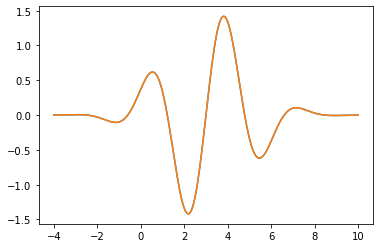

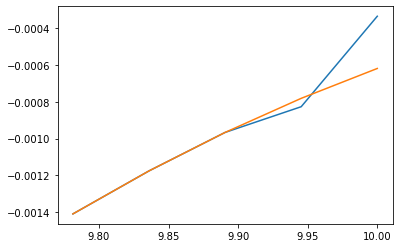

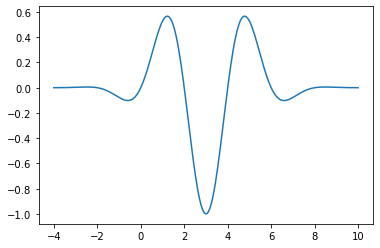

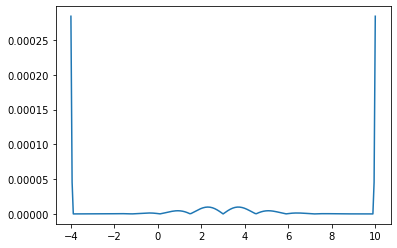

In [4]:
dhdx4tho = nm.deriv_4tho(xx,hh)
dhdx_cent = nm.deriv_dnw(xx,hh)
anader = ana(xx)

plt.plot(xx,dhdx4tho)
plt.plot(xx,anader)
print(dhdx4tho)

plt.figure()
plt.plot(xx[-5:],dhdx4tho[-5:])
plt.plot(xx[-5:],anader[-5:])

plt.figure()
plt.plot(xx,hh)
plt.figure()
err = [np.abs(x-an) for x,an in zip(dhdx4tho,anader)]
plt.plot(xx,err)